In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ts.utility import Utility
from ts.experimental import GeneralizedExtremeValueDistribution, GevEstimate, Pso

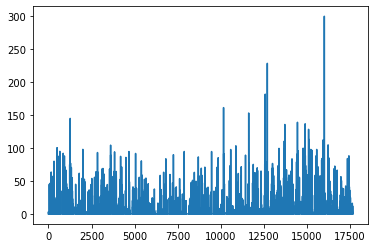

In [15]:
rainfall_series = pd.read_csv('../datasets/rainfall-data.csv')['..R/F'].to_numpy()

_ = plt.plot(rainfall_series)

# Weekly Maximum

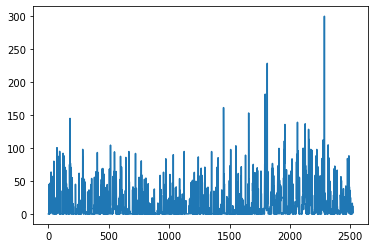

In [16]:
week_max_series = Utility.applyBlockAggregateFunc(
    rainfall_series, 7,
    lambda x: x.max(axis=0),
    considerPartial='no-front'
)

_ = plt.plot(week_max_series)

Shape: 9.992079309827357, Location: 0.4064822994367307, Scale: 4.061603374172636, max log likelihood: 5463.223380763186


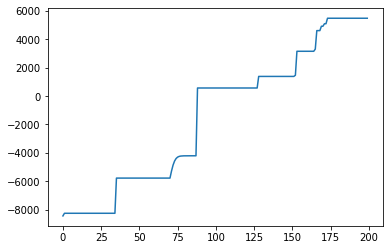

In [21]:
params, max_log_likelihood, max_log_likelihood_vals = GevEstimate.psoMethod(
    week_max_series,
    Pso.computeInitialPos([(-10, 10), (0, 100), (1, 10)], 200),
    numIterations=200
)

shape, location, scale = params
print(f'Shape: {shape}, Location: {location}, Scale: {scale}, max log likelihood: {max_log_likelihood}')



_ = plt.plot(max_log_likelihood_vals)

In [30]:
def get_return_level(shape, location, scale, prob):
    
    if shape == 0:
        return location - scale * np.log(-np.log(1 - prob))
        
    return location - (scale / shape) * (1 - ((-np.log(1 - prob)) ** (-shape)))

In [54]:
prob = 0.50
print('Return Level for p = %0.3f is %0.3f'
      %(prob, get_return_level(shape, location, scale, prob)))

Return Level for p = 0.500 is 15.832


In [55]:
prob = 0.40
print('Return Level for p = %0.3f is %0.3f'
      %(prob, get_return_level(shape, location, scale, prob)))

Return Level for p = 0.400 is 334.198


In [56]:
def get_most_likely_point(shape, location, scale, low, high, num_particles, num_iter):
    
    def min_func(x):
        
        log_lkhd = GeneralizedExtremeValueDistribution\
            .logLikelihood(shape, location, scale, np.array([x]))
        
        return -log_lkhd if log_lkhd is not None else np.inf
    
    init_pos = Pso.computeInitialPos([(low, high)], num_particles)
    
    return Pso.pso(min_func, init_pos, numIterations=num_iter)

[9.90389456e-08]


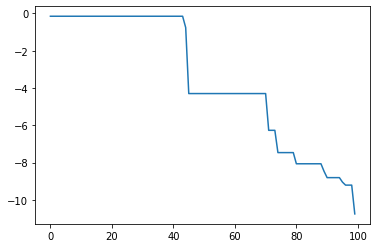

In [60]:
params, min_neg_log_lkhd, lkhd_vals = get_most_likely_point(shape, location, scale, 20, 300, 200, 100)

plt.plot(lkhd_vals)
print(params)